In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
warnings.filterwarnings('ignore')

In [3]:
# Load dataset
df = pd.read_csv("cities_r2.csv")

In [4]:
# Exploratory Data Analysis
print("First 5 rows of the dataset:\n", df.head())
print("\nDataset statistics:\n", df.describe())
print("\nData types:\n", df.dtypes)
print("\nNull values:\n", df.isnull().sum())

First 5 rows of the dataset:
   name_of_city  state_code      state_name  dist_code  population_total  \
0      Abohar            3          PUNJAB          9            145238   
1    Achalpur           27     MAHARASHTRA          7            112293   
2    Adilabad           28  ANDHRA PRADESH          1            117388   
3   Adityapur           20       JHARKHAND         24            173988   
4       Adoni           28  ANDHRA PRADESH         21            166537   

   population_male  population_female  0-6_population_total  \
0            76840              68398                 15870   
1            58256              54037                 11810   
2            59232              58156                 13103   
3            91495              82493                 23042   
4            82743              83794                 18406   

   0-6_population_male  0-6_population_female  ...  literates_female  \
0                 8587                   7283  ...             44972

In [5]:
# Data Preprocessing (if necessary)
# Encoding categorical variables using Label Encoding (if applicable)
# Example: if there are categorical columns like 'City' or 'Region', we can encode them
# df['City'] = labelencoder.fit_transform(df['City'])

In [6]:

# Selecting the 'effective_literacy_rate_total' column for clustering
feature = 'effective_literacy_rate_total'

In [7]:
# Check for zero or missing values and handle them if necessary
print("Number of zero values in {}: {}".format(feature, df[df[feature] == 0].shape[0]))
print("Number of missing values in {}: {}".format(feature, df[feature].isnull().sum()))

Number of zero values in effective_literacy_rate_total: 0
Number of missing values in effective_literacy_rate_total: 0


In [8]:
# Handle missing or zero values by replacing or dropping (if necessary)
df[feature].fillna(df[feature].mean(), inplace=True)

In [9]:
# Scaling the data for clustering
scaler = StandardScaler()
df[feature] = scaler.fit_transform(df[[feature]])

In [10]:
# Apply Hierarchical Clustering
# Using 'ward' linkage method for hierarchical clustering
linked = linkage(df[[feature]], method='ward')

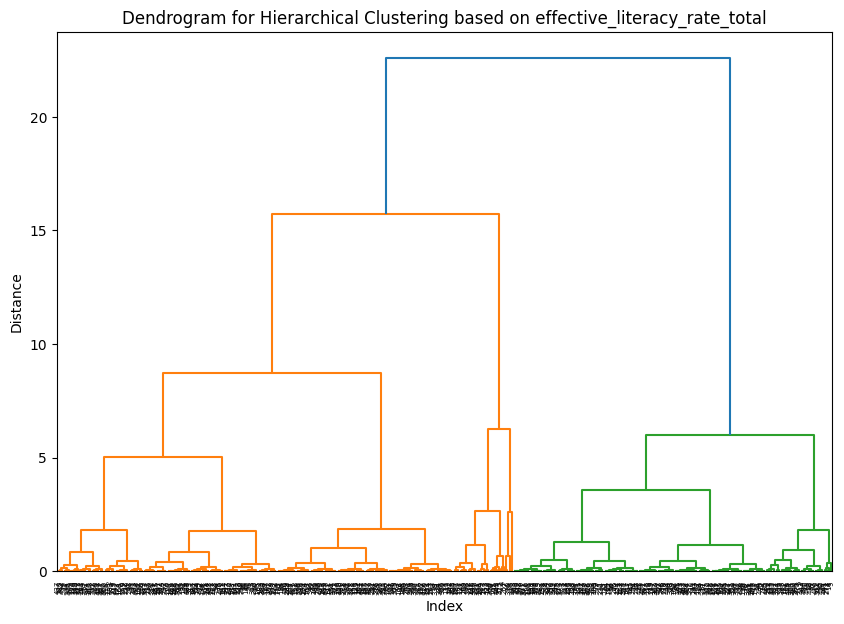

In [11]:
# Plotting the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=df.index, distance_sort='descending', show_leaf_counts=True)
plt.title("Dendrogram for Hierarchical Clustering based on effective_literacy_rate_total")
plt.xlabel("Index")
plt.ylabel("Distance")
plt.show()

In [12]:
# Assigning clusters based on a threshold distance
# Choose an optimal threshold to cut the dendrogram
threshold = 5  # Adjust based on dendrogram to find optimal clusters
df['Cluster'] = fcluster(linked, threshold, criterion='distance')

In [13]:
# Display cluster information
print("Cluster assignments:\n", df['Cluster'].value_counts())

Cluster assignments:
 Cluster
2    161
5    112
6     85
7     55
1     42
4     33
3      5
Name: count, dtype: int64


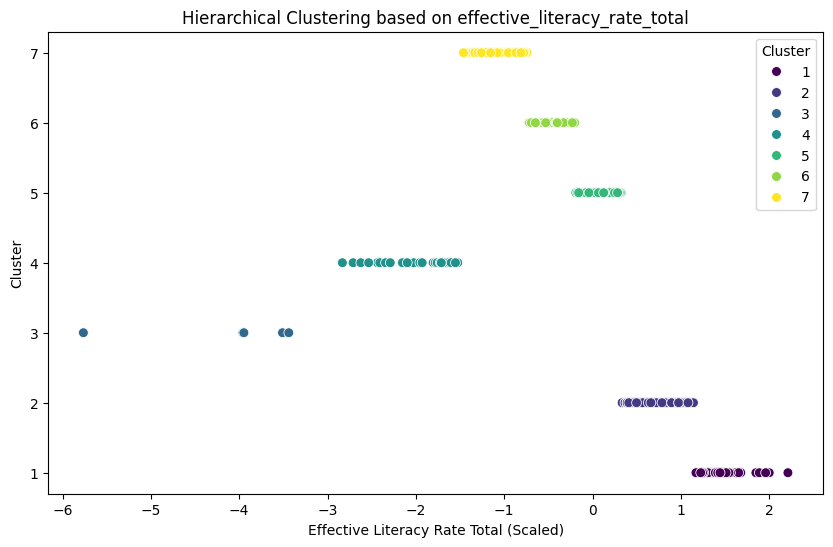

In [14]:
# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=feature, y='Cluster', data=df, hue='Cluster', palette='viridis', s=50)
plt.title("Hierarchical Clustering based on effective_literacy_rate_total")
plt.xlabel("Effective Literacy Rate Total (Scaled)")
plt.ylabel("Cluster")
plt.legend(title="Cluster")
plt.show()